In [2]:
import numpy as np
import os
import pandas as pd
import re
from plotfx import *
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [4]:
os.chdir('C:\\Users\\Hali\\Documents\\Graduate School Documents\\PhD Program\\Dissertation\\COVID Campus\\Results\\Appeal')
os.getcwd()

'C:\\Users\\Hali\\Documents\\Graduate School Documents\\PhD Program\\Dissertation\\COVID Campus\\Results'

In [5]:
sims = ['beta006_multiNPI_0vax_hicom_correlated']
partitions = np.arange(5)
sim_names = [sim + '_' + str(part) + '.csv' for sim in sims for part in partitions]

In [6]:
sim_names

['beta006_multiNPI_0vax_hicom_correlated_0.csv',
 'beta006_multiNPI_0vax_hicom_correlated_1.csv',
 'beta006_multiNPI_0vax_hicom_correlated_2.csv',
 'beta006_multiNPI_0vax_hicom_correlated_3.csv',
 'beta006_multiNPI_0vax_hicom_correlated_4.csv']

In [7]:
df = pd.DataFrame()
for file in sim_names:
    tmpdf = pd.read_csv(file, header = 0, dtype = {'rep': int, 'p_vax': float, 'test_freq': int})
    part = int(file[-5])
    tmpdf['partition'] = np.repeat(part, repeats = tmpdf.shape[0])
    df = df.append(tmpdf, ignore_index = True)

In [8]:
df.shape

(60500, 8)

In [9]:
df.head()

,rep,test_freq,p_sd,p_fm,p_vax,cum_uniq_inf,ext_inf_ct,partition
0,1,0,0.0,0.0,0.0,468,120,0
1,2,0,0.0,0.0,0.0,435,107,0
2,3,0,0.0,0.0,0.0,423,106,0
3,4,0,0.0,0.0,0.0,467,107,0
4,5,0,0.0,0.0,0.0,429,92,0


In [10]:
# Renumber reps to remove duplicates
df['rep'] = df['rep'] + df['partition']*20
df.tail()

,rep,test_freq,p_sd,p_fm,p_vax,cum_uniq_inf,ext_inf_ct,partition
60495,96,28,1.0,1.0,0.0,124,123,4
60496,97,28,1.0,1.0,0.0,127,133,4
60497,98,28,1.0,1.0,0.0,145,147,4
60498,99,28,1.0,1.0,0.0,124,130,4
60499,100,28,1.0,1.0,0.0,161,161,4


In [11]:
# Load comparison dataframes
refsims = ['beta006_multiNPI_0vax_hicom']
partitions = np.arange(5)
refsim_names = [sim + '_' + str(part) + '.csv' for sim in refsims for part in partitions]
refsim_names

['beta006_multiNPI_0vax_hicom_0.csv',
 'beta006_multiNPI_0vax_hicom_1.csv',
 'beta006_multiNPI_0vax_hicom_2.csv',
 'beta006_multiNPI_0vax_hicom_3.csv',
 'beta006_multiNPI_0vax_hicom_4.csv']

In [12]:
refdf = pd.DataFrame()
for file in refsim_names:
    tmpdf = pd.read_csv(file, header = 0, dtype = {'rep': int, 'p_vax': float, 'test_freq': int})
    part = int(file[-5])
    tmpdf['partition'] = np.repeat(part, repeats = tmpdf.shape[0])
    refdf = refdf.append(tmpdf, ignore_index = True)

In [13]:
# Renumber reps to remove duplicates
refdf['rep'] = refdf['rep'] + refdf['partition']*20
refdf.tail()

,rep,test_freq,p_sd,p_fm,p_vax,cum_uniq_inf,ext_inf_ct,partition
60495,96,28,1.0,1.0,0.0,124,123,4
60496,97,28,1.0,1.0,0.0,127,133,4
60497,98,28,1.0,1.0,0.0,145,147,4
60498,99,28,1.0,1.0,0.0,124,130,4
60499,100,28,1.0,1.0,0.0,162,163,4


### Plot Heatmaps

In [14]:
aggdf = df.groupby(['test_freq','p_sd','p_fm'])['cum_uniq_inf'].describe()
aggdf

count    mean        std    min     25%    50%     75%  \
test_freq p_sd p_fm                                                           
0         0.0  0.0   100.0  452.89  19.008714  406.0  439.75  453.0  466.00   
               0.1   100.0  404.62  24.569333  349.0  389.75  403.5  422.25   
               0.2   100.0  360.27  29.785718  284.0  342.75  364.0  381.25   
               0.3   100.0  313.37  26.228851  229.0  297.75  316.0  333.00   
               0.4   100.0  273.28  24.168633  209.0  258.00  274.0  288.00   
...                    ...     ...        ...    ...     ...    ...     ...   
28        1.0  0.6   100.0  144.66  13.613882  111.0  136.00  143.0  154.00   
               0.7   100.0  141.34  12.192248  110.0  134.00  141.0  149.00   
               0.8   100.0  139.90  12.166770  106.0  131.75  141.0  146.25   
               0.9   100.0  138.48  11.643249  107.0  129.75  140.0  147.25   
               1.0   100.0  135.63  11.541454  109.0  127.00  136.0  144.00   

                       max  
test_freq p_sd p_fm         
0         0.0  0.0   499.0  
               0.1   458.0  
               0.2   413.0  
               0.3   368.0  
               0.4   337.0  
...                    ...  
28        1.0  0.6   189.0  
               0.7   174.0  
               0.8   179.0  
               0.9   170.0  
               1.0   168.0  

[605 rows x 8 columns]

In [15]:
annotate = ["Random\nAssignment", "Clustered\nMasking"]
title = 'Every {freq} Days'
titles = [title.format(freq = f) for f in [3,7,14,28]] + ['Symptomatic Only']
titles

['Every 3 Days',
 'Every 7 Days',
 'Every 14 Days',
 'Every 28 Days',
 'Symptomatic Only']

In [16]:
dfs = [refdf, df]

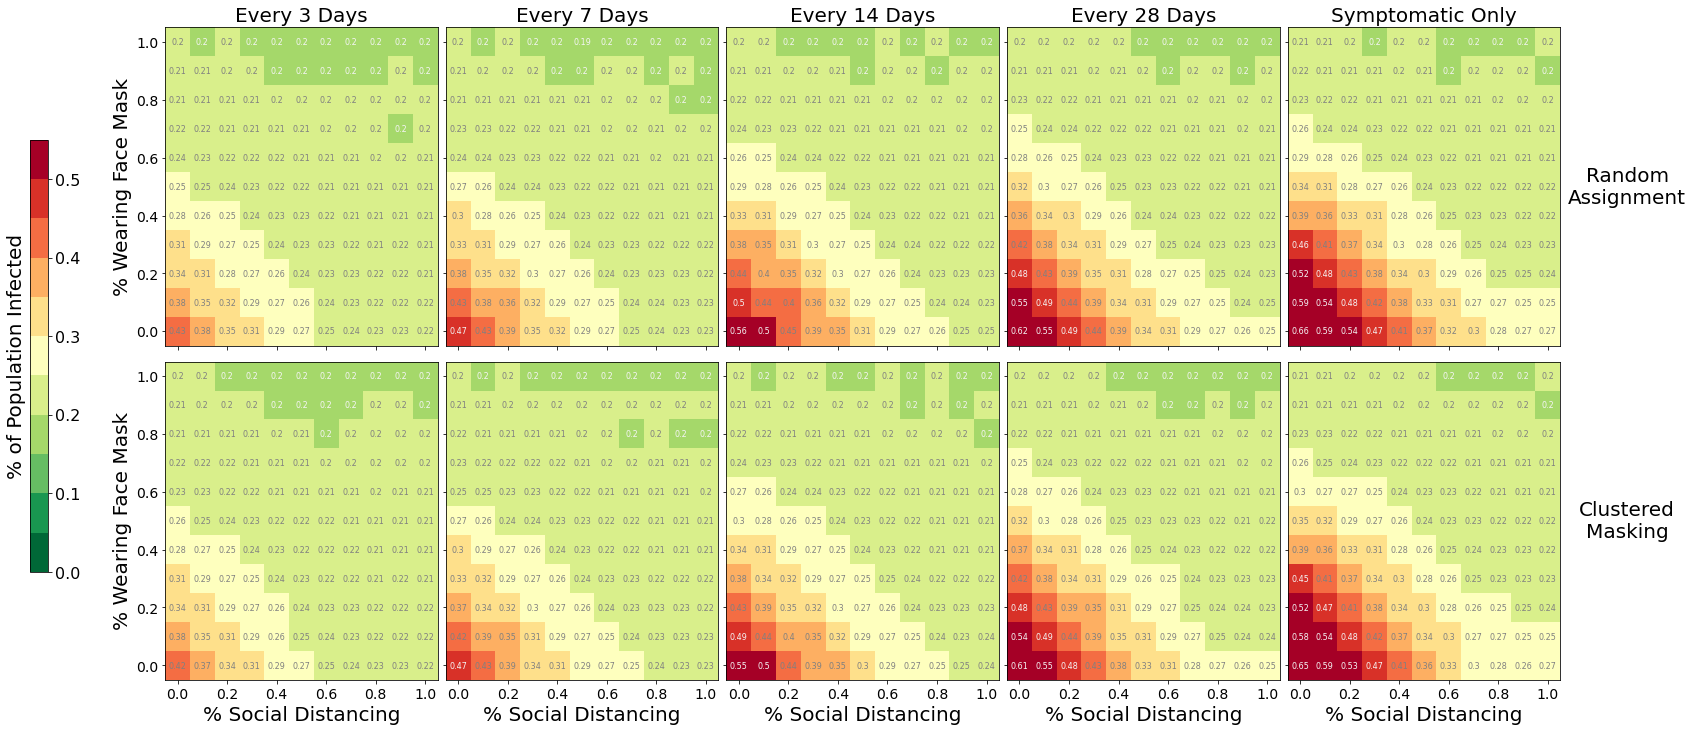

In [17]:
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'xx-large'

f, axs = plt.subplots(2, 5, figsize = (25, 12), sharex = True, sharey = True)
#f.suptitle('Testing Frequency', fontsize = 20, y = 0.93)
f.subplots_adjust(wspace=0.03, hspace=0.05)

# Loop through rows
for (i, frame) in enumerate(dfs):
    
    # Loop through testing values (columns)
    for (j, tf) in enumerate(df.test_freq.unique()):
        
        if tf==0:
            j = 4
        else:
            j = j-1
        
        # Format data
        pltdf = frame.loc[(frame.test_freq == tf)]
        xvals = pltdf.p_sd.unique()
        yvals = pltdf.p_fm.unique()
        pltx = [min(xvals)-0.05] + ((xvals[1:]+xvals[:-1])/2).tolist() + [max(xvals) + 0.05]
        plty = [min(yvals)-0.05] + ((yvals[1:]+yvals[:-1])/2).tolist() + [max(yvals) + 0.05]
        # Column index corresponds to x-coord, row corresponds to y-coord
        vals = np.array(pltdf.groupby(['p_sd','p_fm'])['cum_uniq_inf'].mean()).reshape((11,11)).T/692

        # Make plot
        bounds = np.linspace(0, 0.55, 12) # for locom setting
        #bounds = np.linspace(0, 0.65, 14) # for hicom setting
        norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
        im = axs[i,j].pcolormesh(pltx, plty, vals, norm = norm, cmap='RdYlGn_r')
        if i==0:
            axs[i,j].set_title(titles[j], fontsize = 20)
        if j==0:
            axs[i,j].set_ylabel('% Wearing Face Mask', fontsize = 20)
        if (i+1)==len(dfs):
            axs[i,j].set_xlabel('% Social Distancing', fontsize = 20)
            
        # Adjust ticks and labels
        axs[i,j].tick_params(axis = 'x', labelsize = 14)
        axs[i,j].tick_params(axis = 'y', labelsize = 14)

        # Annotate if last column
        if (j+1)==df.test_freq.nunique():
            axs[i,j].text(1.32, 0.5, annotate[i], fontsize = 20, ha='center', va='center')

        # Add text annotations
        for (k, x) in enumerate(xvals):
            for (l, y) in enumerate(yvals):
                if (vals[l,k]>=0.2) & (vals[l,k]<=0.45):
                    text = axs[i,j].text(x, y, np.around(vals[l,k],2), ha="center", va="center", color = "gray", fontsize = 8)
                else:
                    text = axs[i,j].text(x, y, np.around(vals[l,k],2), ha="center", va="center", color = "whitesmoke", fontsize = 8)


# Add colorbar
cbar_ax = f.add_axes([0.05, 0.25, 0.01, 0.5])
f.colorbar(im, ax=axs.ravel().tolist(), cax = cbar_ax, label = '% of Population Infected')
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('left')
cbar_ax.yaxis.label.set_size(20)
cbar_ax.tick_params(labelsize=16)
plt.savefig('Heatmap_hicom_corr_trans.eps', bbox_inches='tight', transparent=True);